In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
sns.set_style('dark')

%matplotlib inline

In [9]:
df = pd.read_csv('Data/Processed/flights_dep_weather_joined.csv')

In [10]:
# Dropping flights that had a multiples weather records after joining in SQL.
df = df.drop_duplicates(subset=['tail_num','crs_dep_datetime','crs_arr_datetime','origin','dest'])

# Exploratory Data Analysis

Text(0, 0.5, 'Flights')

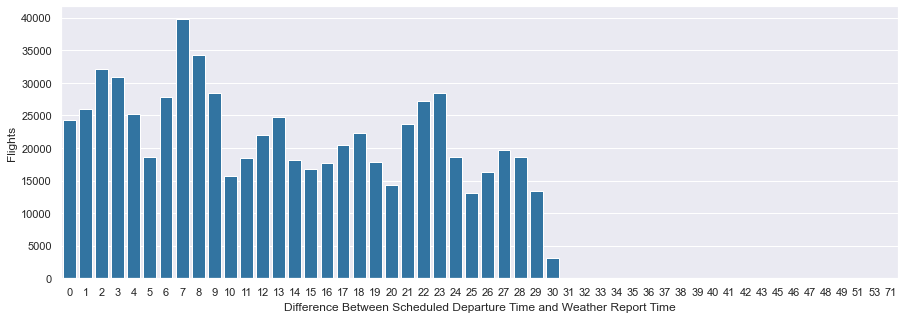

In [11]:
sns.set(rc={'figure.figsize':(15, 5)})
sns.countplot(data=df, x='dep_w_diff', color='tab:blue')
plt.xlabel('Difference Between Scheduled Departure Time and Weather Report Time')
plt.ylabel('Flights')

After joining the flights and weather data in SQL Server we can see that nearly all flights were assigned a weather report within 30 minutes of their scheduled departure time. Not too bad..

Text(0.5, 1.0, 'August 2019 Flights Flown by Aircraft Age')

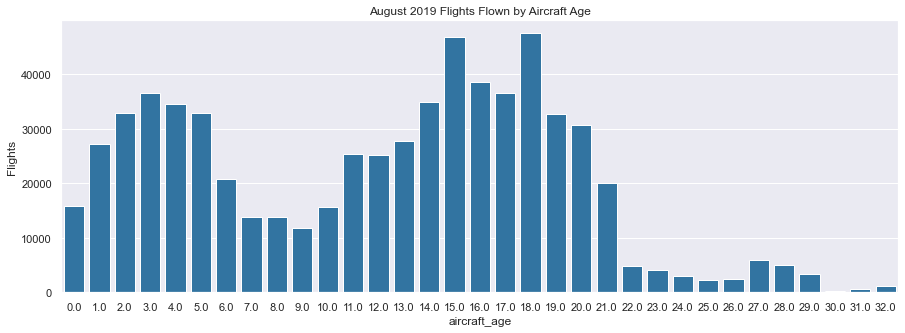

In [12]:
sns.countplot(data=df, x='aircraft_age', color='tab:blue')
plt.ylabel('Flights')
plt.title('August 2019 Flights Flown by Aircraft Age')

The distribution of flights flown by aircraft age portrays the cyclic approach of airlines to fleet renewal. The first peak in the chart signifies the next generation of aircraft such as the Boeing 787, Airbus A350, and A220, whereas the second peak displays the previous generation, such as the A319, B737, and B767. 

Text(0.5, 1.0, 'August 2019 Departure Delays by Top 20 Routes')

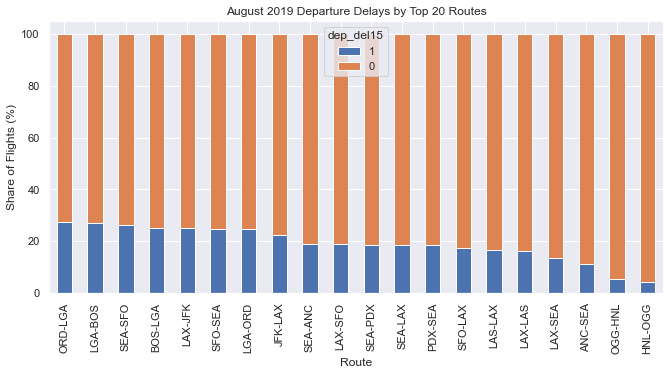

In [13]:
sns.set(rc={'figure.figsize':(11, 5)})
df['route'] = df['origin'] + '-' + df['dest']

route_del = pd.crosstab(df['route'], df['dep_del15'])
route_del['total'] = route_del[0] + route_del[1] 
route_del[0] = route_del[0]*100 / route_del['total'] 
route_del[1] = route_del[1]*100 / route_del['total'] 
t20_routes = route_del.sort_values('total', ascending=False).head(20).sort_values(1, ascending=False)

t20_routes[[1,0]].plot(kind='bar', stacked=True)
plt.xlabel('Route')
plt.ylabel('Share of Flights (%)')
plt.title('August 2019 Departure Delays by Top 20 Routes')

Text(0.5, 1.0, 'August 2019 Departure Delays by Top 20 Origin Airports')

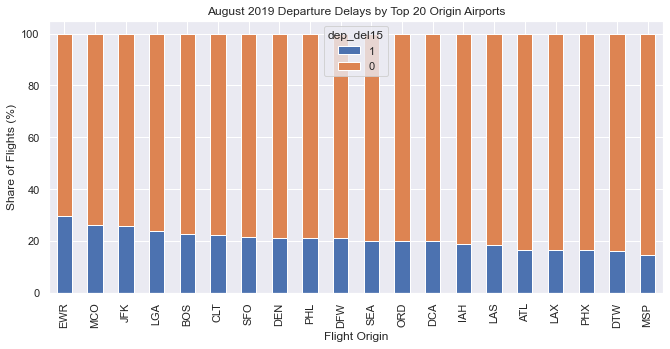

In [14]:
origin_del = pd.crosstab(df['origin'], df['dep_del15'])
origin_del['total'] = origin_del[0] + origin_del[1] 
origin_del[0] = origin_del[0]*100 / origin_del['total'] 
origin_del[1] = origin_del[1]*100 / origin_del['total'] 
t20 = origin_del.sort_values('total', ascending=False).head(20).sort_values(1, ascending=False)

t20[[1,0]].plot(kind='bar', stacked=True)
plt.xlabel('Flight Origin')
plt.ylabel('Share of Flights (%)')
plt.title('August 2019 Departure Delays by Top 20 Origin Airports')

Text(0, 0.5, 'Share of Flights (%)')

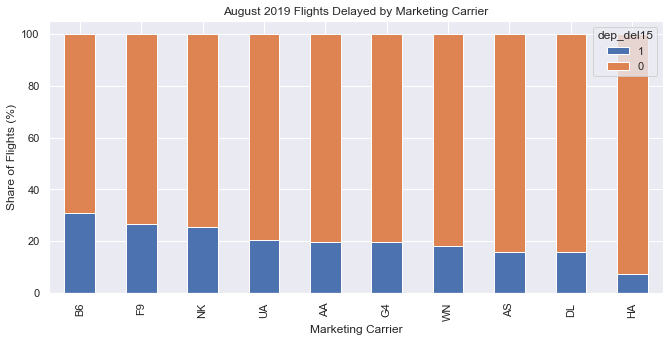

In [15]:
carrier_del = pd.crosstab(df['mkt_carrier'], df['dep_del15'], normalize='index').apply(lambda x: x*100).sort_values(1, ascending=False)

carrier_del[[1,0]].plot(kind ='bar', stacked=True)
plt.title('August 2019 Flights Delayed by Marketing Carrier')
plt.xlabel('Marketing Carrier')
plt.ylabel('Share of Flights (%)')

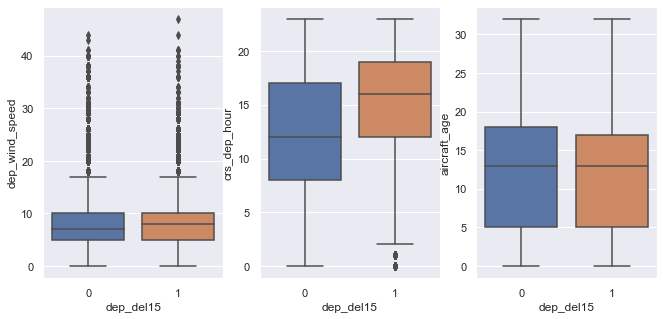

In [16]:
fig, ax = plt.subplots(ncols=3)

i=0
for col in ['dep_wind_speed','crs_dep_hour','aircraft_age']:
    sns.boxplot(x='dep_del15', y=col, data=df, ax=ax[i])
    i+=1

We have a lot of outliers for wind speed at the scheduled departure time. However, as shown below, high wind speeds do have some correlation with delays therefore they will not be removed from the dataset.

Text(0.5, 1.0, 'August 2019 Flights Delayed by Departure Wind Gust Speed')

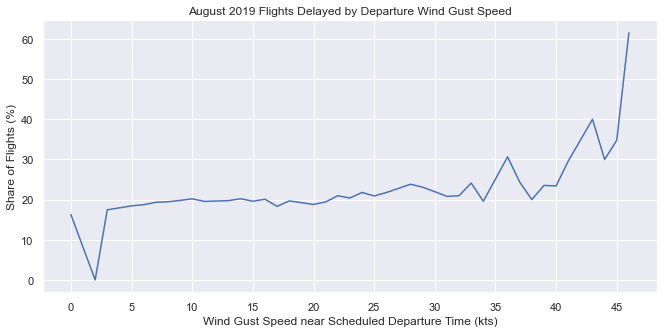

In [17]:
wind_del = pd.crosstab(df['dep_wind_gust_speed'], df['dep_del15'], normalize='index').apply(lambda x: x*100).head(40)

wind_del[1].plot(kind='line')
plt.xticks(np.arange(0,50, step=5))
plt.ylabel('Share of Flights (%)')
plt.xlabel('Wind Gust Speed near Scheduled Departure Time (kts)')
plt.title('August 2019 Flights Delayed by Departure Wind Gust Speed')

Text(0, 0.5, 'Share of Flights (%)')

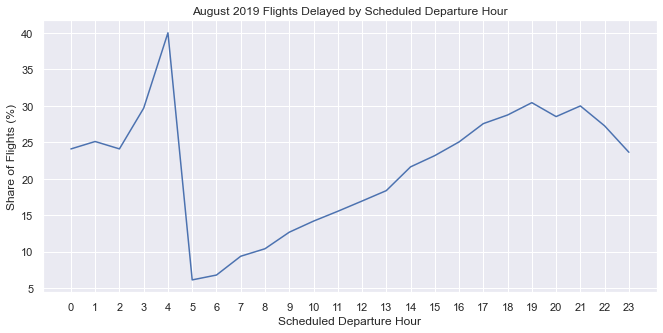

In [18]:
dep_time_del = pd.crosstab(df['crs_dep_hour'], df['dep_del15'], normalize='index').apply(lambda x: x*100)

dep_time_del[1].plot(kind='line')
plt.title('August 2019 Flights Delayed by Scheduled Departure Hour')
plt.xticks(np.arange(0,24))
plt.xlabel('Scheduled Departure Hour')
plt.ylabel('Share of Flights (%)')

Text(0.5, 0, 'Thunderstorm in Vicinity at Scheduled Departure Time')

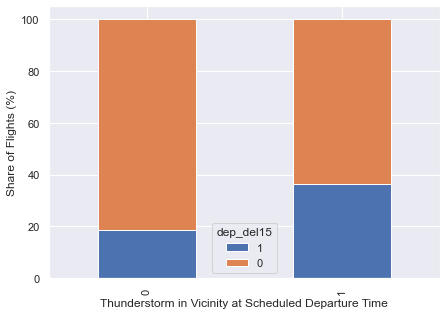

In [19]:
sns.set(rc={'figure.figsize':(7, 5)})

thunder_dep = pd.crosstab(df['dep_thunderstorm'], df['dep_del15'], normalize='index').apply(lambda x: x*100)
thunder_dep[[1,0]].plot(kind='bar', stacked=True)
plt.ylabel('Share of Flights (%)')
plt.xlabel('Thunderstorm in Vicinity at Scheduled Departure Time')

Text(0, 0.5, 'Share of Flights (%)')

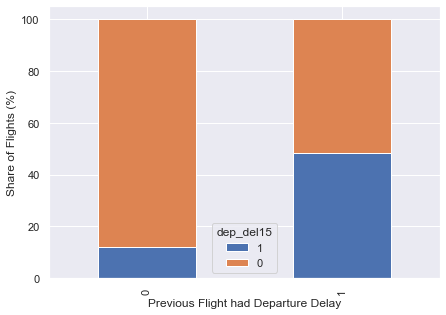

In [20]:
prev_fl_del = pd.crosstab(df['prev_fl_del'], df['dep_del15'], normalize='index').apply(lambda x: x*100)
prev_fl_del[[1,0]].plot(kind='bar', stacked=True)
plt.xlabel('Previous Flight had Departure Delay')
plt.ylabel('Share of Flights (%)')

# Feature Selection

In [21]:
# Filtering dataset to remove any flight where the difference between the arrival and departure time and the weather report time is greater than 30 minutes.
df = df[df['dep_w_diff'] <= 30]

In [22]:
df.columns

Index(['crs_dep_datetime', 'crs_dep_date', 'crs_dep_time', 'crs_dep_hour',
       'crs_arr_datetime', 'crs_arr_date', 'crs_arr_time',
       'mkt_carrier_airline_id', 'mkt_carrier', 'mkt_carrier_fl_num', 'origin',
       'dest', 'dep_slot_controlled', 'arr_slot_controlled',
       'origin_airport_id', 'dest_airport_id', 'origin_city_name',
       'dest_city_name', 'origin_city_market_id', 'dest_city_market_id',
       'origin_state_nm', 'dest_state_nm', 'tail_num', 'dep_del15',
       'prev_fl_del', 'aircraft_age', 'dep_station', 'arr_station',
       'dep_report_datetime', 'dep_report_date', 'dep_report_time',
       'dep_wind_speed', 'dep_wind_gust_speed', 'dep_visibility', 'dep_fog',
       'dep_thunderstorm', 'dep_rain', 'dep_w_diff', 'route'],
      dtype='object')

In [23]:
df.corr()['dep_del15'].sort_values(ascending=False)

dep_del15                 1.000000
prev_fl_del               0.359839
crs_dep_hour              0.192060
dep_rain                  0.066766
dep_thunderstorm          0.062212
mkt_carrier_airline_id    0.055385
arr_slot_controlled       0.047704
dep_slot_controlled       0.028419
dep_wind_speed            0.028265
dep_wind_gust_speed       0.026940
dest_airport_id           0.000253
aircraft_age             -0.003354
dep_w_diff               -0.003737
dest_city_market_id      -0.004781
dep_fog                  -0.005366
dep_visibility           -0.005598
mkt_carrier_fl_num       -0.011482
origin_airport_id        -0.013899
origin_city_market_id    -0.018719
Name: dep_del15, dtype: float64

In [24]:
# Selecting model features
df_model = df[['dep_del15','prev_fl_del','crs_dep_hour','dep_thunderstorm','arr_slot_controlled']]

<AxesSubplot:>

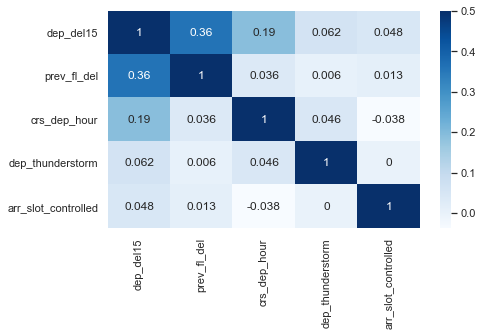

In [25]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.heatmap(df_model.corr().round(decimals=3), cmap='Blues', vmax=.5, annot=True)

A large number of different features were tested until the best model performance was achieved. All features of interest were numerical, therefore no conversion of categorical features was required.

In [26]:
X = df_model.drop('dep_del15', axis=1)
y = df_model.dep_del15.values

# Models

In [27]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Before building a model, notice that we are dealing with an imbalanced classification problem as the ratio of non-delayed to delayed flights in the dataset is approximately 4 to 1, as shown below.

In [28]:
df.dep_del15.value_counts(normalize=True)

0    0.809918
1    0.190082
Name: dep_del15, dtype: float64

The imbalance also means using the accuracy score to evaluate model performance may be misleading. Instead, I will focus on the f1-score as the optimal model should correctly predict as large a share of the actual delayed flights as possible without significantly impacting the precision score. 

The classification models I want to explore are logistic regression, decision tree, and random forest. In theory, with an imbalanced dataset and some multicollinearity between features, random forest should perform well. I chose to exclude support vector machines as the run time will be slow on a dataset of this size. 

In [29]:
# Using the default model parameters
lm = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()

In [30]:
for model in [lm, dtc, rfc]:
    print(model, cross_val_score(model, X, y, cv=10, scoring='f1').mean())

LogisticRegression() 0.430200511761324
DecisionTreeClassifier() 0.5077326510493463
RandomForestClassifier() 0.5077683844075017


Using 10-fold cross validation we can see that the decision tree and random forest classifiers performed better than the logistic regression, although all have relatively poor f1 scores. 

Lets take a closer look at each of these models when using their default parameters.

In [31]:
# Using the same train-test split for all models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Default Parameter Models

### Logistic Regression

In [32]:
lm.fit(X_train, y_train)
lm_pred = lm.predict(X_test)
print(classification_report(y_test, lm_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91    164608
           1       0.65      0.32      0.43     38777

    accuracy                           0.84    203385
   macro avg       0.75      0.64      0.67    203385
weighted avg       0.82      0.84      0.82    203385



### Decision Tree

In [33]:
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
print(classification_report(y_test, dtc_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91    164608
           1       0.64      0.42      0.51     38777

    accuracy                           0.84    203385
   macro avg       0.76      0.68      0.71    203385
weighted avg       0.83      0.84      0.83    203385



### Random Forest

In [34]:
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91    164608
           1       0.64      0.42      0.50     38777

    accuracy                           0.84    203385
   macro avg       0.76      0.68      0.71    203385
weighted avg       0.83      0.84      0.83    203385



We can see that the all three models are good at predicting flights that were not delayed but struggle at predicting flights that were delayed. Of the three, random forest performed the best.

## Hyperparameter Tuning

### Logistic Regression

In [35]:
weights = [{0:0.15,1:0.85},{0:0.2,1:0.8},{0:0.25,1:0.75},{0:0.3,1:0.7},{0:0.35,1:0.65}]
param_grid = dict(class_weight=weights)
grid = GridSearchCV(lm, param_grid=param_grid, n_jobs=-1, cv=10, scoring='f1')

In [36]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'class_weight': [{0: 0.15, 1: 0.85}, {0: 0.2, 1: 0.8},
                                          {0: 0.25, 1: 0.75}, {0: 0.3, 1: 0.7},
                                          {0: 0.35, 1: 0.65}]},
             scoring='f1')

In [37]:
grid.best_score_
grid.best_estimator_

LogisticRegression(class_weight={0: 0.3, 1: 0.7})

In [38]:
lm = LogisticRegression(class_weight={0:0.3,1:0.7})
lm.fit(X_train, y_train)
lm_pred = lm.predict(X_test)
print(classification_report(y_test, lm_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89    164608
           1       0.55      0.47      0.51     38777

    accuracy                           0.83    203385
   macro avg       0.71      0.69      0.70    203385
weighted avg       0.82      0.83      0.82    203385



Adjusting the class weights of the logistic regression improved the f1-score for delayed flights considerably. However, the default parameter decision tree and random forest models still maintain better performance. 

### Random Forest

In [39]:
weights = [{0:0.2,1:0.8},{0:0.25,1:0.75},{0:0.3,1:0.7},{0:0.35,1:0.65}]
param_grid = dict(class_weight=weights)
grid = GridSearchCV(rfc, param_grid=param_grid, cv=5, scoring='f1')

In [40]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': [{0: 0.2, 1: 0.8}, {0: 0.25, 1: 0.75},
                                          {0: 0.3, 1: 0.7},
                                          {0: 0.35, 1: 0.65}]},
             scoring='f1')

In [41]:
grid.best_score_
grid.best_estimator_

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7})

In [42]:
rfc = RandomForestClassifier(n_estimators=50, class_weight={0:0.33,1:0.67})
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91    164608
           1       0.62      0.45      0.52     38777

    accuracy                           0.84    203385
   macro avg       0.75      0.69      0.71    203385
weighted avg       0.83      0.84      0.83    203385

